<a href="https://colab.research.google.com/github/drewski28/heroku_push/blob/master/functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```



####Functions Overview

This is an exploration of functions https://github.com/drewski28/heroku_push/issues/1#issue-988360275

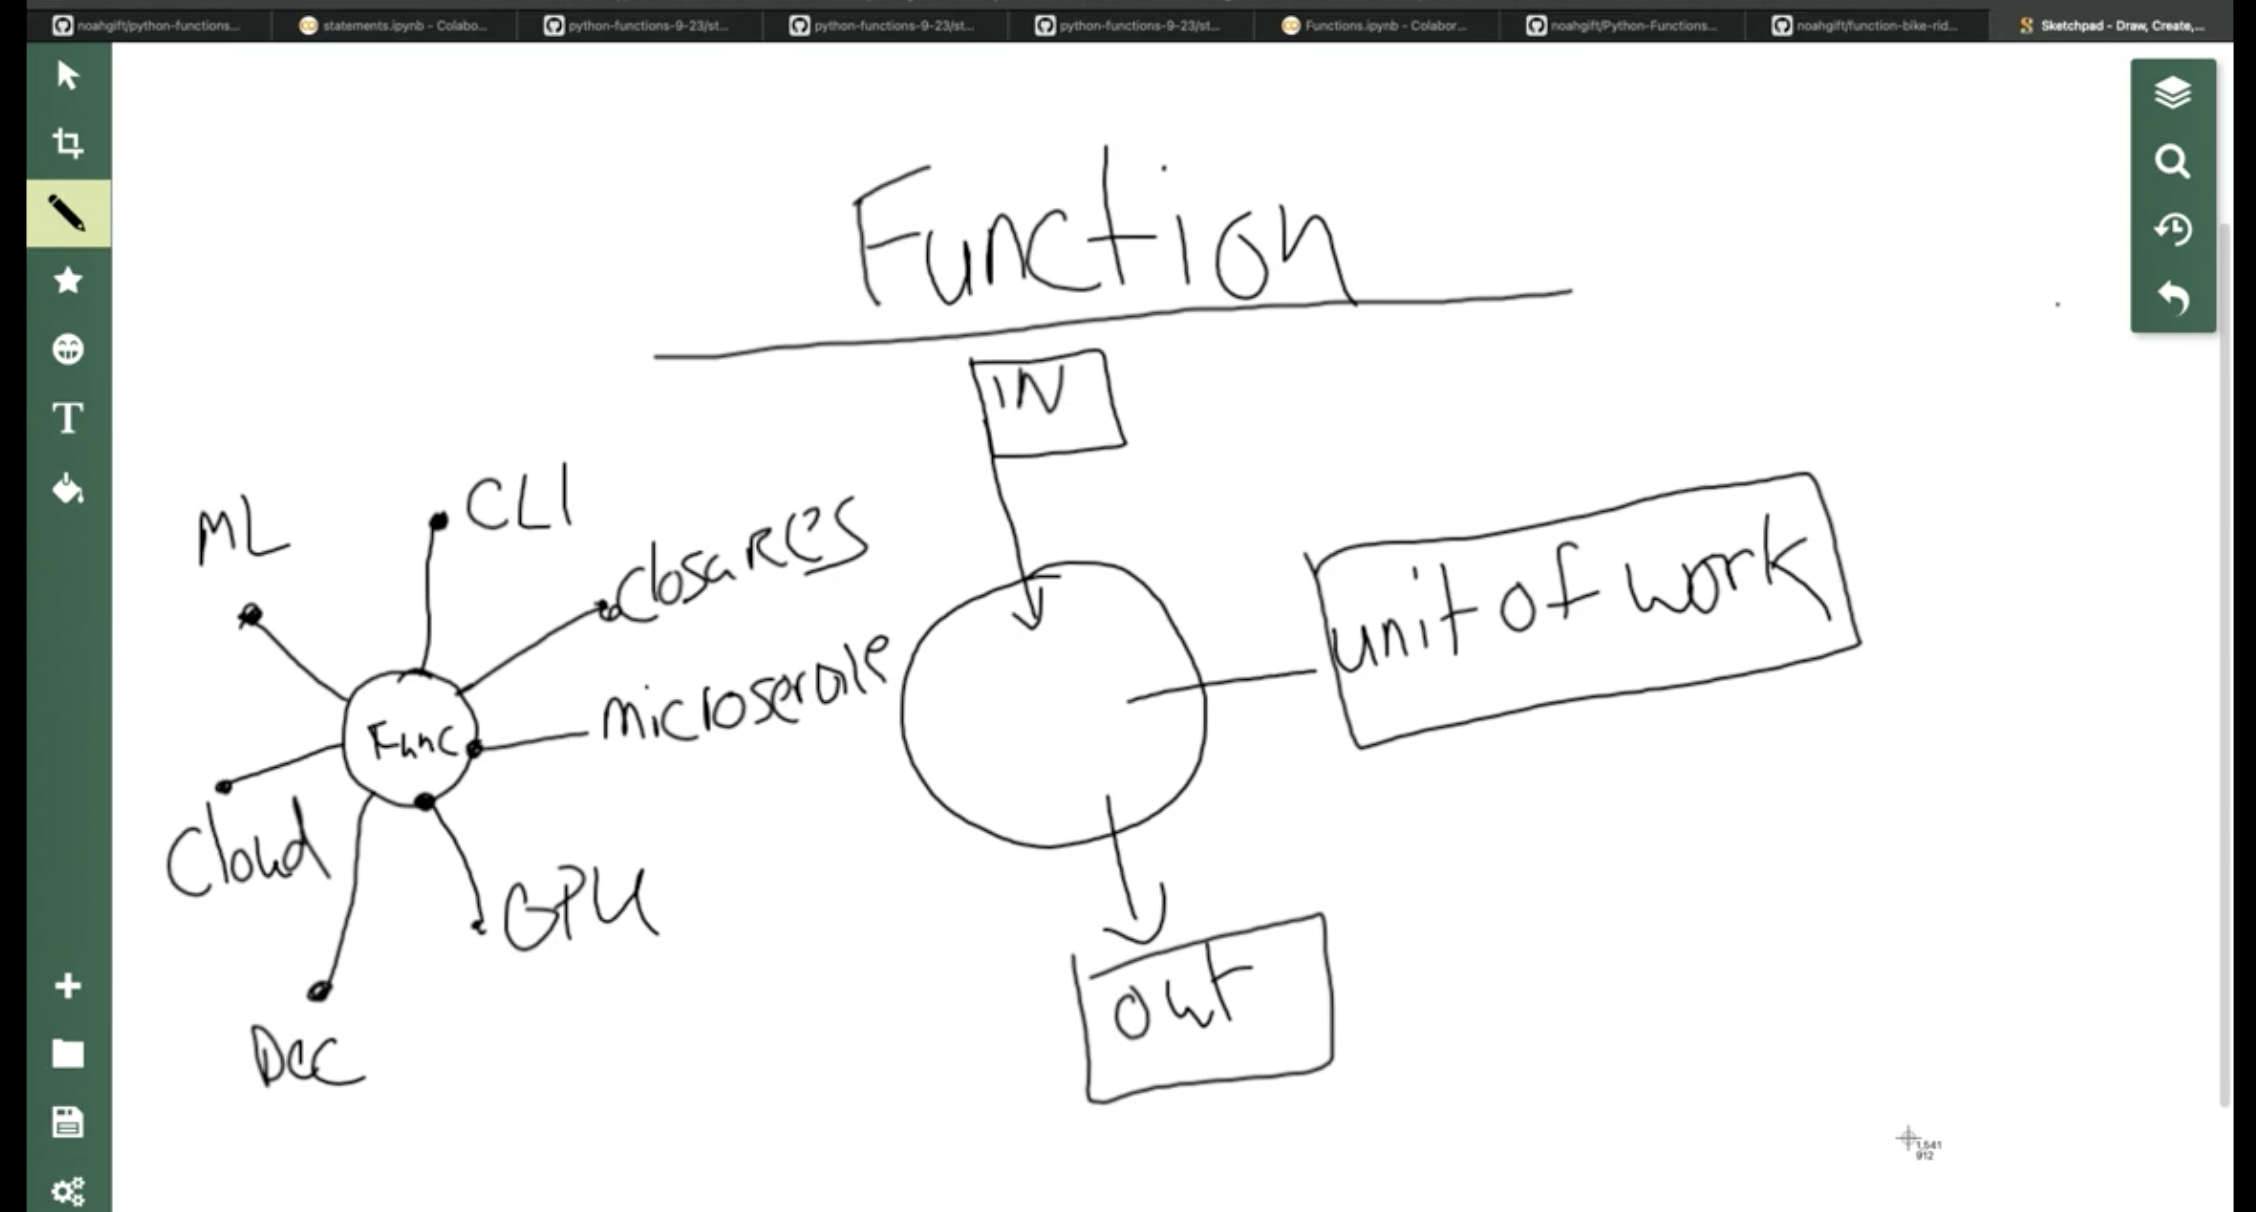

###Function that takes input

In [ ]:
def accept(x):
  print(f"This was passed in: {x}")

In [ ]:
accept("hello")

This was passed in: hello


In [ ]:
var = accept("hello")
type(var)

This was passed in: hello


NoneType

###Function that returns values

In [ ]:
def more(x):
  print(f"This was passed in: {x}")
  return x + 1

In [ ]:
more(2)

This was passed in: 2


3

In [ ]:
result = more(2)

This was passed in: 2


In [ ]:
type(result)

int

In [ ]:
result

3

In [ ]:
def add(x,y):
  return x+y

In [ ]:
add(2,2)

4

####Python Function Positional arguments

In [ ]:
def add_more(x,y):
  print(f"this variable {x} is greater {y} ")

In [ ]:
add_more(2,1)

this variable 2 is greater 1 


In [ ]:
x =2
y =1
add_more(y,x)

this variable 1 is greater 2 


####Python Keyword Arguments


In [ ]:
def add_keyword(x=2, y= 1):
   print(f"this variable {x} is greater {y}")
   return x +y



In [ ]:
add_keyword(y =1 ,x =2)

this variable 2 is greater 1


3

Python Decorator and Generators

In [ ]:

def lazy_return_random_attacks():
    """Yield attacks each time"""
    import random
    attacks = {"kimura": "upper_body",
           "straight_ankle_lock":"lower_body", 
           "arm_triangle":"upper_body",
            "keylock": "upper_body",
            "knee_bar": "lower_body"}
    while True:
        random_attack = random.choices(list(attacks.keys()))
        ##yield tells python to consume only "ONE" thing at a time
        yield random_attack
        
#Make all attacks appear as Upper Case
upper_case_attacks = (attack.pop().upper() for attack in lazy_return_random_attacks())

In [ ]:
next(upper_case_attacks)

'STRAIGHT_ANKLE_LOCK'

In [ ]:
# Generator Pipeline:  One expression chains into the next
#Make all attacks appear as Upper Case
upper_case_attacks = (attack.pop().upper() for attack in lazy_return_random_attacks())
#Remove the underscore
remove_underscore = (attack.split("_") for attack in upper_case_attacks)
#Create a new phrase 
new_attack_phrase = (" ".join(phrase) for phrase in remove_underscore)
#this is where you can call an AI API
#my_api_call = comprehend(new_attack_phrase)

In [ ]:
for number in range(10):
    print(next(new_attack_phrase))

KEYLOCK
ARM TRIANGLE
KIMURA
STRAIGHT ANKLE LOCK
KEYLOCK
STRAIGHT ANKLE LOCK
KEYLOCK
KIMURA
KNEE BAR
KIMURA


####Decorator





In [ ]:
def randomized_speed_attack_decorator(function):
    """Randomizes the speed of attacks"""
    
    import time
    import random
    
    def wrapper_func(*args, **kwargs):
        sleep_time = random.randint(0,3)
        print(f"Attacking after {sleep_time} seconds")
        time.sleep(sleep_time)
        #args kwards allows to accept a unlimited number of arguments
        #can do introspection without this you are limted to a specific 
        #colab designed more for scientific computing more designed for statments
        

        return function(*args, **kwargs)
    return wrapper_func

In [ ]:
@randomized_speed_attack_decorator
def lazy_return_random_attacks():
    """Yield attacks each time"""
    import random
    attacks = {"kimura": "upper_body",
           "straight_ankle_lock":"lower_body", 
           "arm_triangle":"upper_body",
            "keylock": "upper_body",
            "knee_bar": "lower_body"}
    while True:
        random_attack = random.choices(list(attacks.keys()))
        yield random_attack

In [ ]:
for _ in range(5):
    print(next(lazy_return_random_attacks()))

Attacking after 0 seconds
['straight_ankle_lock']
Attacking after 1 seconds
['keylock']
Attacking after 2 seconds
['knee_bar']
Attacking after 0 seconds
['keylock']
Attacking after 0 seconds
['kimura']


In [23]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
      ts = time()
      result = f(*args,**kw)
      te = time()
      print(f"DEBUG!!! function name: {f.__name__}, args:[{args}, {kw}] took {te-ts} sec")
      return result
    return wrap



In [24]:
def add(x,y):
    return x+y

In [25]:
add(2,3)

5

In [26]:
@timing
def add(x,y):
    return x+ y


In [27]:
add(2,2)

DEBUG!!! function name: add, args:[(2, 2), {}] took 1.4781951904296875e-05 sec


4

####How Closures Work


In [29]:
def one():
  return 1


In [28]:
def outer():
  return one


In [30]:
res = outer()

In [32]:
type(res)

function

In [31]:
res()

1

###Nested function

In [46]:
def outer():
  def inner():
      return " I was inside"
  return inner

In [45]:
result = outer()
type(result)

function

In [47]:
result()

' I was inside'

In [49]:
#nonlocal cannot modify this variable
#lower_body_counter=5
def attack_counter():
    """Counts number of attacks on part of body"""
    lower_body_counter = 0
    upper_body_counter = 0
    #print(lower_body_counter)
    def attack_filter(attack):
        nonlocal lower_body_counter
        nonlocal upper_body_counter
        attacks = {"kimura": "upper_body",
           "straight_ankle_lock":"lower_body", 
           "arm_triangle":"upper_body",
            "keylock": "upper_body",
            "knee_bar": "lower_body"}
        if attack in attacks:
            if attacks[attack] == "upper_body":
                upper_body_counter +=1
            if attacks[attack] == "lower_body":
                lower_body_counter +=1
        print(f"Upper Body Attacks {upper_body_counter}, Lower Body Attacks {lower_body_counter}")
    return attack_filter

In [50]:
fight = attack_counter()

In [51]:
type(fight)

function

In [52]:
fight("kimura")

Upper Body Attacks 1, Lower Body Attacks 0


#### Wildcard Variables for Functions

In [57]:
def output(*args):
  print(f"You passed in this many items to the function: {len(args)}")
  for  arg in args:
       print(arg)
     

In [58]:
output(1)

You passed in this many items to the function: 1
1


In [59]:
output(1,2)

You passed in this many items to the function: 2
1
2


In [60]:
output(1,2,3)

You passed in this many items to the function: 3
1
2
3


In [71]:
def more(**kwargs):
  print(f"You passed in this many items to the function: {len(kwargs)}")
  for key, value in kwargs.items():
    print(f"This is the key: {key}")
    print(f"This is the value: {value}")

In [72]:
more(one=1)

You passed in this many items to the function: 1
This is the key: one
This is the value: 1


In [73]:
more(one=1, two=2, three=3)

You passed in this many items to the function: 3
This is the key: one
This is the value: 1
This is the key: two
This is the value: 2
This is the key: three
This is the value: 3
